In [57]:
import jax.numpy as jnp

from tensorflow_probability.substrates.jax.distributions import Normal

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('whitegrid')

0.7141981


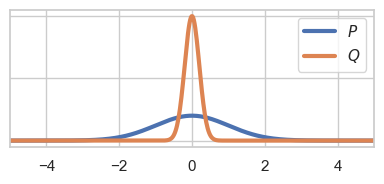

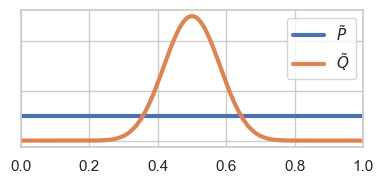

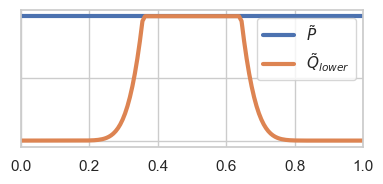

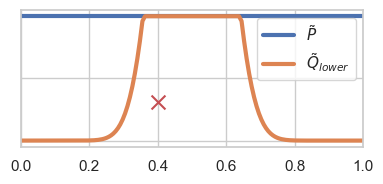

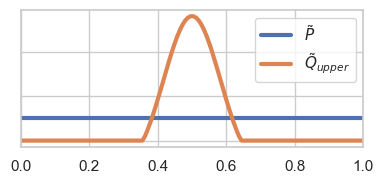

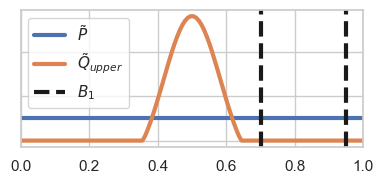

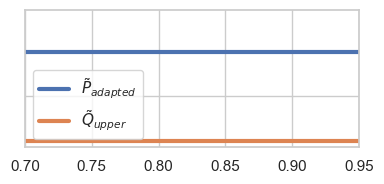

In [58]:
q_loc = 0.
q_scale = 0.2

q = Normal(q_loc, q_scale)
p = Normal(0., 1.)

xss = jnp.linspace(-5., 5., 500)
uss = p.cdf(xss)

level = 1

log_level = jnp.log(level)

nu = q_loc / (1. - q_scale**2)
kappa = q_scale**2 / (1. - q_scale**2)
zeta = 1. / (1. - q_scale**2) / Normal(0., jnp.sqrt(1. - q_scale**2)).prob(q_loc)

radius_sq = kappa * (2 * log_level + 2 * jnp.log(zeta) - jnp.log(2. * jnp.pi) - jnp.log(kappa))
radius = jnp.sqrt(radius_sq)

sol_1_, sol_2_ = nu - radius, nu + radius
sol_1, sol_2 = p.cdf(sol_1_), p.cdf(sol_2_)

figsize = (4, 2)

# Original setup
fig, ax = plt.subplots(figsize=figsize)

ax.plot(xss, p.prob(xss), label=r'$P$', lw=3)
ax.plot(xss, q.prob(xss), label=r'$Q$', lw=3)

ax.tick_params(axis='y', which='both', labelleft=False)
ax.set_xlim([jnp.min(xss), jnp.max(xss)])
ax.legend()
fig.tight_layout()
fig.savefig('img/original_grs.png', dpi=300)


# In CDF space
fig, ax = plt.subplots(figsize=figsize)

ax.plot(uss, jnp.ones_like(uss), label=r'$\tilde{P}$', lw=3)
ax.plot(uss, jnp.exp(q.log_prob(xss) - p.log_prob(xss)), lw=3, label=r'$\tilde{Q}$')

ax.tick_params(axis='y', which='both', labelleft=False)
ax.set_xlim([0., 1.])
ax.legend()
fig.tight_layout()
fig.savefig('img/cdf_grs.png', dpi=300)


# Just the cut stuff
fig, ax = plt.subplots(figsize=figsize)

ax.plot(uss, jnp.ones_like(uss), lw=3, label=r'$\tilde{P}$')
ax.plot(uss, 
        jnp.minimum(jnp.exp(q.log_prob(xss) - p.log_prob(xss)), 1.), lw=3, label=r'$\tilde{Q}_{lower}$')

ax.tick_params(axis='y', which='both', labelleft=False)
ax.legend()
ax.set_xlim([0., 1.])
fig.tight_layout()
fig.savefig('img/lower_cut_grs.png', dpi=300)


# Just the cut stuff with rejected sample
fig, ax = plt.subplots(figsize=figsize)

ax.plot(uss, jnp.ones_like(uss), lw=3, label=r'$\tilde{P}$')
ax.plot(uss, 
        jnp.minimum(jnp.exp(q.log_prob(xss) - p.log_prob(xss)), 1.), lw=3, label=r'$\tilde{Q}_{lower}$')

ax.scatter(0.4, 0.314, marker='x', c='r', s=100)

ax.tick_params(axis='y', which='both', labelleft=False)
ax.legend()
ax.set_xlim([0., 1.])
fig.tight_layout()
fig.savefig('img/lower_cut_with_rejected_grs.png', dpi=300)


# Renormalized remainder
dr = Normal(nu, jnp.sqrt(kappa))
norm_const = 1 + q.prob(sol_2_) - q.prob(sol_1_) - (sol_2 - sol_1)
print(norm_const)

fig, ax = plt.subplots(figsize=figsize)

ax.tick_params(axis='y', which='both', labelleft=False)
ax.plot(uss, jnp.ones_like(uss), label=r'$\tilde{P}$', lw=3)
ax.plot(uss, 
        (jnp.maximum(jnp.exp(q.log_prob(xss) - p.log_prob(xss)), 1.) - 1.) / norm_const, 
        lw=3,
        label=r'$\tilde{Q}_{upper}$')

ax.legend()
ax.set_xlim([0., 1.])
fig.tight_layout()
fig.savefig('img/upper_cut_grs.png', dpi=300)

# Renormalized remainder with bounds:
fig, ax = plt.subplots(figsize=figsize)

ax.tick_params(axis='y', which='both', labelleft=False)
ax.plot(uss, jnp.ones_like(uss), label=r'$\tilde{P}$', lw=3)
ax.plot(uss, 
        (jnp.maximum(jnp.exp(q.log_prob(xss) - p.log_prob(xss)), 1.) - 1.) / norm_const, 
        lw=3,
        label=r'$\tilde{Q}_{upper}$')

ax.axvline(0.95, ls='--', c='k', lw=3, label=r"$B_1$")
ax.axvline(0.7, ls='--', c='k', lw=3)

ax.legend()
ax.set_xlim([0., 1.])
fig.tight_layout()
fig.savefig('img/upper_cut_with_bound_grs.png', dpi=300)

# Renormalized remainder with refined proposal:
fig, ax = plt.subplots(figsize=figsize)

ax.tick_params(axis='y', which='both', labelleft=False)
ax.plot(uss, 4. * jnp.ones_like(uss), label=r'$\tilde{P}_{adapted}$', lw=3)
ax.plot(uss, 
        (jnp.maximum(jnp.exp(q.log_prob(xss) - p.log_prob(xss)), 1.) - 1.) / norm_const, 
        lw=3,
        label=r'$\tilde{Q}_{upper}$')

# ax.axvline(0.95, ls='--', c='k', lw=3, label=r"$B_1$")
# ax.axvline(0.7, ls='--', c='k', lw=3)

ax.legend()
ax.set_xlim([0.7, 0.95])
fig.tight_layout()
fig.savefig('img/upper_cut_with_refined_proposal_grs.png', dpi=300)


plt.show()